In [1]:
import mysql.connector
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import euclidean_distances

In [2]:
db_writer = mysql.connector.connect(
   host="104.154.187.13",
    database="masters",
    user="root",
    passwd="smu")

In [3]:
sent = "We are best monkeys"
sent = sent.strip().lower().replace('(', '').replace(')', '')
corpus = [] 
corpus.append(sent)

query = "select text from Sentences where language_key='EN'"
cursor = db_writer.cursor()
cursor.execute(query)
row = cursor.fetchone() 

In [4]:
while row is not None:
    row = row[0].strip().lower().replace('(', '').replace(')', '')
    corpus.append(row)
    row = cursor.fetchone()

In [5]:
cursor.close()
db_writer.close()

In [6]:
corpus

['we are best monkeys',
 'i have lost my passport',
 'someone stole my money',
 'help',
 'may i have the bill',
 'i would like dessert',
 'i would like to order',
 'may i see a menu',
 'i would like a drink',
 'i would like some water',
 'a table for two',
 'a table for four',
 'how far is it to the airport',
 'how far is it to the hotel',
 'how do you get to the airport',
 'how do you get to the hotel',
 'where is the bank',
 'where can i find a restaurant',
 'where is the hospital',
 'where can i find a grocery store',
 'how do i call down to the front desk',
 'how do i call for room service',
 'my room is messy, and i would like it cleaned',
 'my room needs towels',
 'is there free breakfast',
 'how do i access the internet',
 'where are the elevators',
 'what floor am i on',
 'how many beds are in the room',
 'does the room have a bathroom',
 'i don’t understand',
 'i would like to go to the airport',
 'i would like to go to the the mall',
 'i would like to go to the the hotel',
 '

In [7]:
vectorizer = CountVectorizer()
features = vectorizer.fit_transform(corpus).todense()
print(vectorizer.vocabulary_)

{'we': 299, 'are': 19, 'best': 33, 'monkeys': 193, 'have': 136, 'lost': 173, 'my': 198, 'passport': 222, 'someone': 253, 'stole': 258, 'money': 192, 'help': 140, 'may': 183, 'the': 268, 'bill': 36, 'would': 313, 'like': 169, 'dessert': 68, 'to': 275, 'order': 216, 'see': 240, 'menu': 186, 'drink': 80, 'some': 252, 'water': 296, 'table': 264, 'for': 113, 'two': 283, 'four': 116, 'how': 149, 'far': 98, 'is': 158, 'it': 159, 'airport': 11, 'hotel': 148, 'do': 74, 'you': 314, 'get': 123, 'where': 306, 'bank': 27, 'can': 44, 'find': 104, 'restaurant': 234, 'hospital': 146, 'grocery': 130, 'store': 260, 'call': 43, 'down': 78, 'front': 120, 'desk': 67, 'room': 237, 'service': 243, 'messy': 187, 'and': 16, 'cleaned': 55, 'needs': 200, 'towels': 279, 'there': 269, 'free': 117, 'breakfast': 39, 'access': 2, 'internet': 157, 'elevators': 87, 'what': 304, 'floor': 108, 'am': 14, 'on': 212, 'many': 181, 'beds': 31, 'in': 154, 'does': 75, 'bathroom': 28, 'don': 76, 'understand': 284, 'go': 124, 'ma

In [8]:
values=[]
for f in features[1:]:
    values.append(euclidean_distances(features[0],f))

In [9]:
values = np.array(values)
values

array([[[2.82842712]],

       [[2.82842712]],

       [[2.23606798]],

       [[2.82842712]],

       [[2.64575131]],

       [[2.82842712]],

       [[2.64575131]],

       [[2.64575131]],

       [[2.82842712]],

       [[2.64575131]],

       [[2.64575131]],

       [[3.31662479]],

       [[3.31662479]],

       [[3.31662479]],

       [[3.31662479]],

       [[2.82842712]],

       [[2.82842712]],

       [[2.82842712]],

       [[3.        ]],

       [[3.46410162]],

       [[3.16227766]],

       [[3.60555128]],

       [[2.82842712]],

       [[2.82842712]],

       [[3.        ]],

       [[2.44948974]],

       [[2.82842712]],

       [[3.        ]],

       [[3.        ]],

       [[2.44948974]],

       [[3.60555128]],

       [[4.        ]],

       [[4.        ]],

       [[3.46410162]],

       [[3.        ]],

       [[3.31662479]],

       [[2.82842712]],

       [[3.        ]],

       [[3.        ]],

       [[2.82842712]],

       [[2.82842712]],

       [[2.64575

In [10]:
values.size

200

In [11]:
index_min = np.argmin(values)
index_min

128

In [12]:
values[128]

array([[2.]])

In [14]:
print(corpus[127])
print(corpus[128])
print(corpus[129])


do you carry this in different sizes
do you mind
should we


### Cosine Similarity

In [15]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(corpus)
print (tfidf_matrix.shape)


(201, 317)


In [16]:
from sklearn.metrics.pairwise import cosine_similarity
c_similarity = []
c_similarity.append(cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:]))
c_similarity

[array([[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.20301805, 0.        , 0.14307918, 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.18336926, 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.26846266,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0

In [17]:
index_max = np.argmax(c_similarity)
index_max

179

In [18]:
corpus[180]

'we are good friends'

In [19]:
corpus.pop(0)
corpus.insert(0,"i would like a drink")

In [20]:
corpus

['i would like a drink',
 'i have lost my passport',
 'someone stole my money',
 'help',
 'may i have the bill',
 'i would like dessert',
 'i would like to order',
 'may i see a menu',
 'i would like a drink',
 'i would like some water',
 'a table for two',
 'a table for four',
 'how far is it to the airport',
 'how far is it to the hotel',
 'how do you get to the airport',
 'how do you get to the hotel',
 'where is the bank',
 'where can i find a restaurant',
 'where is the hospital',
 'where can i find a grocery store',
 'how do i call down to the front desk',
 'how do i call for room service',
 'my room is messy, and i would like it cleaned',
 'my room needs towels',
 'is there free breakfast',
 'how do i access the internet',
 'where are the elevators',
 'what floor am i on',
 'how many beds are in the room',
 'does the room have a bathroom',
 'i don’t understand',
 'i would like to go to the airport',
 'i would like to go to the the mall',
 'i would like to go to the the hotel',
 

In [22]:
len(corpus)

201

In [23]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(corpus)

c_similarity = []
c_similarity.append(cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:]))
c_similarity

[array([[0.        , 0.        , 0.        , 0.        , 0.44854373,
         0.43186103, 0.        , 1.        , 0.38368084, 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.26650261, 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.32391398, 0.28605588, 0.30431711, 0.32635575, 0.37783261,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.37335888, 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.37277548, 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0

In [24]:
index_max = np.argmax(c_similarity)
index_max

7

In [25]:
corpus[8]

'i would like a drink'

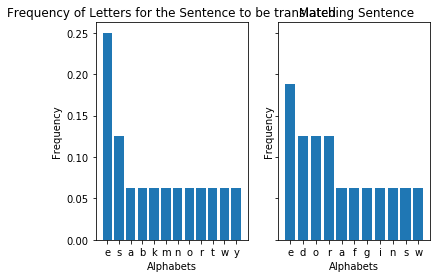

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

test = "we are best monkeys"
sentence = "we are good friends"

# convert input to list of chars so it is easy to get into pandas 
char_list1 = list(test)
char_list2 = list(sentence)

# create a dataframe where each char is one row
df1 = pd.DataFrame({'chars': char_list1})
df2 = pd.DataFrame({'chars': char_list2})

# drop all the space characters
df1 = df1[df1.chars != ' ']
df2 = df2[df2.chars != ' ']

# add a column for aggregation later
df1['num'] = 1
df2['num'] = 1
# group rows by character type, count the occurences in each group
# and sort by occurance
df1 = df1.groupby('chars').sum().sort_values('num', ascending=False) / len(df1)
df2 = df2.groupby('chars').sum().sort_values('num', ascending=False) / len(df2)

# df1 = df1.groupby('chars').sum() / len(df1)
# df2 = df2.groupby('chars').sum() / len(df2)


#plt.bar(df.index, df.num, width=0.5, color='g')
bar_width = 0.35
 
# z = str(df2.index+bar_width)

# fig, ax = plt.subplots()
# ip = ax.bar(df1.index, df1.num, bar_width,
#                 label="Input")



# from_db = ax.bar(z, df2.num,
#                  bar_width, label="DB Sentence")

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

pos1 = np.arange(len(df1.num))
ax1.bar(pos1,df1.num)
plt.sca(ax1)
plt.xticks(pos1,df1.index)

pos2 = np.arange(len(df2.num))
ax2.bar(pos2,df2.num)
plt.sca(ax2)
plt.xticks(pos2,df2.index)

ax1.set_xlabel('Alphabets')
ax1.set_ylabel('Frequency')
ax1.set_title('Frequency of Letters for the Sentence to be translated')

ax2.set_xlabel('Alphabets')
ax2.set_ylabel('Frequency')
ax2.set_title(' Matching Sentence')


# ax.set_xticks(index + bar_width / 2)

ax.legend()

plt.show()

In [36]:
df2.index

Index(['e', 'd', 'o', 'r', 'a', 'f', 'g', 'i', 'n', 's', 'w'], dtype='object', name='chars')

### Using Spacy

In [65]:
# import spacy
# nlp = spacy.load('en')
# doc1 = nlp(corpus)
# doc2 = nlp(sent)
